In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_SAMPLES = 1000
RANDOM_STATE = 2
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=(1.6, 1., 1.5),
    centers=((-7, -7), (1, 1), (7, 5)),
    random_state=RANDOM_STATE
)

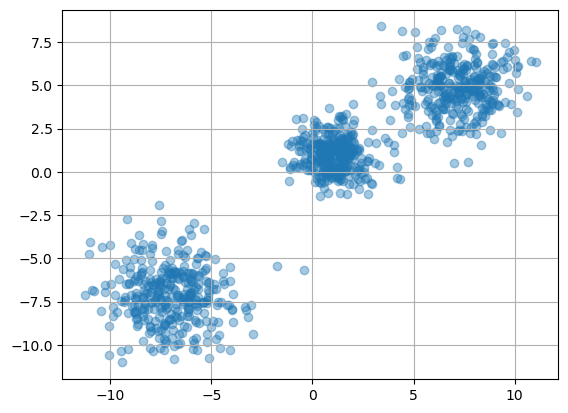

In [3]:
plt.scatter(X[:, 0], X[:, 1], alpha=.4)
plt.grid()

In [4]:
ALL = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2],
    [3, 2],
    [6, 6],
    [7, 6],
    [8, 6],
    [6, 7],
    [7, 7],
    [8, 7],
    [9, 7],
    [7, 8],
    [8, 8],
    [9, 8],
    [8, 9],
    [9, 9],
])

In [5]:
label = np.array([*[0]*8, *[1]*12])

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(3)
model_M = KNeighborsClassifier(5)

In [7]:
from sklearn.model_selection import train_test_split
ALL_train, ALL_test, label_train, label_test = train_test_split(
    ALL, label, test_size=.7, random_state=0
)

In [8]:
knn_class = model.fit(ALL_train, label_train)

In [9]:
knn_class.predict([[0, .3]])

/home/green-machine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [10]:
knn_pred = knn_class.predict(ALL_test)
knn_pred

/home/green-machine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [11]:
label_test

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [12]:
ALL_M = np.vstack([ALL_train, ALL_test])
label_M = np.hstack([label_train, label_test])

In [13]:
from matplotlib.colors import ListedColormap

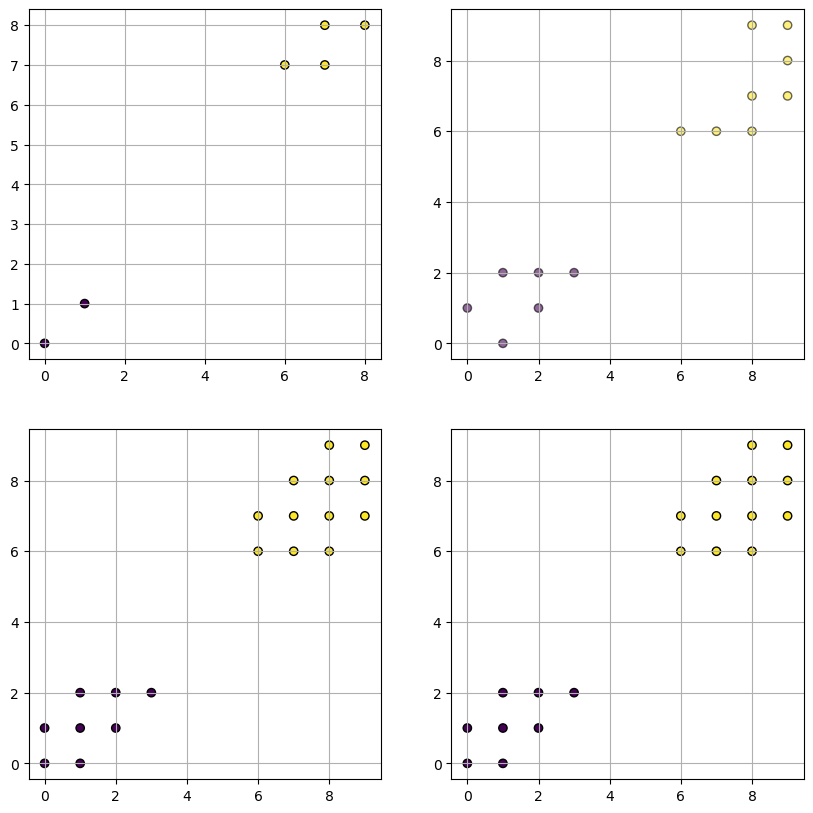

In [14]:
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
plt.scatter(
    ALL_train[:, 0], ALL_train[:, 1], c=label_train, cmap="viridis", edgecolors="k"
)
ax.grid(True)
ax = fig.add_subplot(222)
plt.scatter(
    ALL_test[:, 0], ALL_test[:, 1], c=label_test, cmap="viridis", edgecolors="k", alpha=.6
)
ax.grid(True)
ax = fig.add_subplot(223)
plt.scatter(ALL[:, 0], ALL[:, 1], c=label, cmap="viridis", edgecolors="k")
ax.grid(True)
ax = fig.add_subplot(224)
plt.scatter(ALL_M[:, 0], ALL_M[:, 1], c=label_M, cmap="viridis", edgecolors="k")
ax.grid(True)

/home/green-machine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


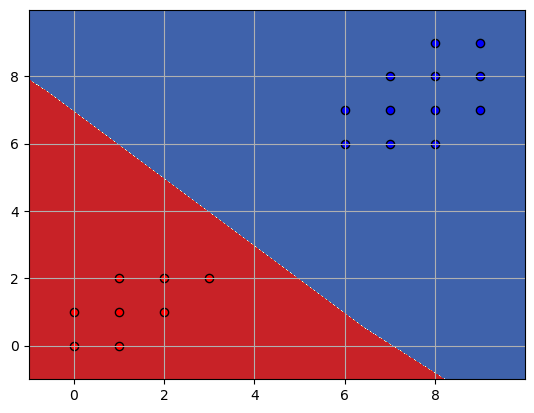

In [15]:
n_classes = 2
plot_colors = "rb"
plot_step = .02

x_min, x_max = ALL[:, 0].min() - 1, ALL[:, 0].max() + 1
y_min, y_max = ALL[:, 0].min() - 1, ALL[:, 0].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=.5, w_pad=.5, pad=2.5)
Z = knn_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for _, color in zip(range(n_classes), plot_colors):
    idx = np.where(label == _)
    plt.scatter(
        ALL[idx, 0],
        ALL[idx, 1],
        c=color,
        cmap=plt.cm.PuBu,
        edgecolor="black",
        s=35,
    )

plt.grid()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.4, random_state=0
)

In [17]:
knn_blob = model_M.fit(X_train, y_train)
knn_pred_blob = knn_blob.predict(X_test)
print("Number of mislabeled points ouf of a total {} points: {}".format(
    X_test.shape[0], (y_test != knn_pred_blob).sum()))

Number of mislabeled points ouf of a total 400 points: 2


/home/green-machine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


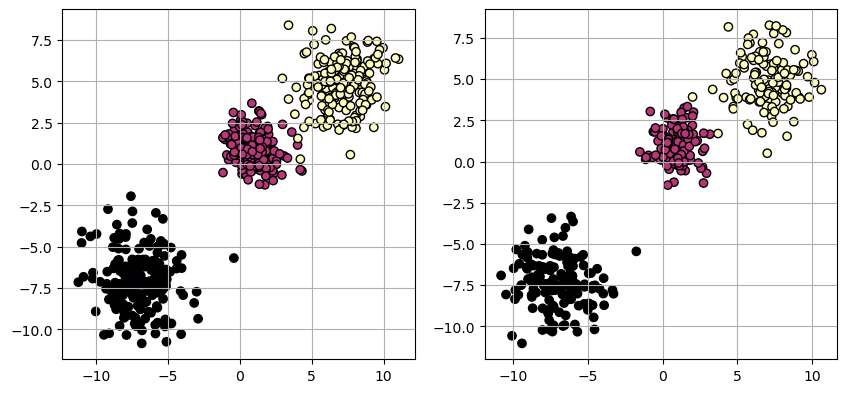

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
plt.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap="magma", edgecolors="k"
)
ax.grid(True)
ax = fig.add_subplot(222)
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap="magma", edgecolors="k"
)
ax.grid(True)

/home/green-machine/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


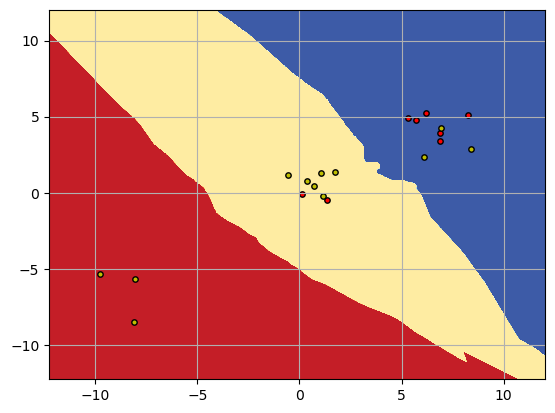

In [19]:
n_classes = 3
plot_colors = "ryb"
plot_step = .02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=.5, w_pad=.5, pad=2.5)

Z = knn_blob.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for _, color in zip(range(n_classes), plot_colors):
    idx = np.where(label == _)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.grid()

Something Went Wrong Above